<a href="https://colab.research.google.com/github/devanshishukla17/Assisgnment-1/blob/main/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv('/content/drive/MyDrive/housing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

splitting into training and test set

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


applying PCA

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_test = pca.fit_transform(X_train)


In [20]:
print(X_test)

[[-0.44848074  1.68386905]
 [ 1.40440792 -1.35097337]
 [-1.01985328  0.4096262 ]
 ...
 [ 0.57916086 -1.38674505]
 [-1.02773789  0.49128597]
 [-2.16546515  0.88164958]]


In [21]:
print(X_test)

[[-0.44848074  1.68386905]
 [ 1.40440792 -1.35097337]
 [-1.01985328  0.4096262 ]
 ...
 [ 0.57916086 -1.38674505]
 [-1.02773789  0.49128597]
 [-2.16546515  0.88164958]]


USING ELBOW METHOD

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

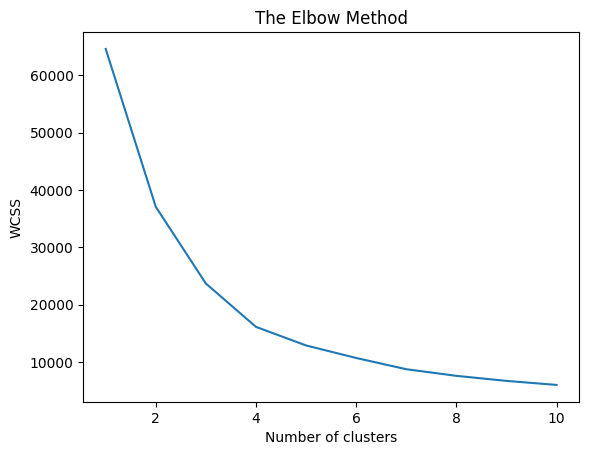

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

training model

In [25]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


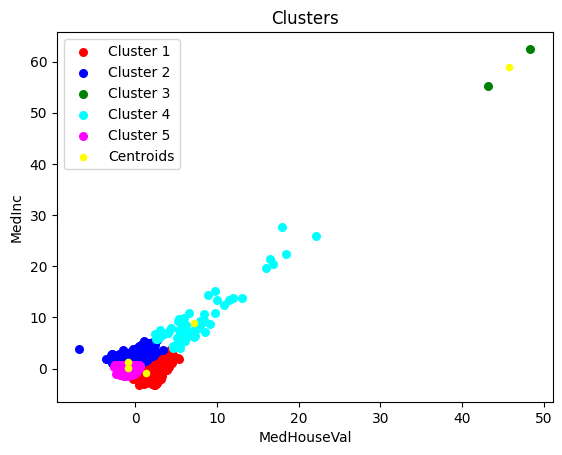

In [26]:
plt.scatter(X_test[y_kmeans == 0, 0], X_test[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_kmeans == 1, 0], X_test[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test[y_kmeans == 2, 0], X_test[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X_test[y_kmeans == 3, 0], X_test[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test[y_kmeans == 4, 0], X_test[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('MedHouseVal')
plt.ylabel('MedInc')
plt.legend()
plt.show()

making the confusion matrix